Vector Autoregression (VAR) model is an extension of univariate autoregression model to multivariate time series data

https://www.statsmodels.org/dev/vector_ar.html

http://www.ams.sunysb.edu/~zhu/ams586/VAR_Lecture2.pdf

In [1]:
#import required packages

import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

#read the data
df = pd.read_csv("~/Downloads/sample_champaign.csv")

df.YEAR = pd.to_datetime(df.YEAR, format='%Y')
df.index = df.YEAR
df = df.drop(['YEAR','Areaname'], axis=1)

#check the dtypes
df

,Median_Household_Income,Poverty_number_of_people,Poverty_percent_of_people,Public_school_enrollment_Fall
YEAR,,,,
1995-01-01,33947,18216,11.6,23624
1997-01-01,38245,18901,12.1,23916
1998-01-01,40519,17753,11.3,28132
1999-01-01,38291,18670,11.2,28035
2000-01-01,39603,19506,11.7,24193
2001-01-01,39269,20039,11.9,24248
2002-01-01,39337,22055,12.8,23995
2003-01-01,39227,21419,12.6,23915
2004-01-01,39914,22790,13.4,24031


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


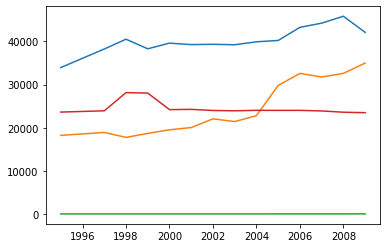

In [2]:
plt.plot(df)

In [3]:
# Augmented Dickey-Fuller Test (ADF Test)/unit root test
from statsmodels.tsa.stattools import adfuller
def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)
    
    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")
#apply adf test on the series
print("\nMedian_Household_Income")
adf_test(df["Median_Household_Income"])
print("\nPoverty_number_of_people")
adf_test(df["Poverty_number_of_people"])
print("\nPoverty_percent_of_people")
adf_test(df["Poverty_percent_of_people"])
print("\nPublic_school_enrollment_Fall")
adf_test(df["Public_school_enrollment_Fall"])


Median_Household_Income
Test Statistic          0.474319
p-value                 0.984071
# Lags                  5.000000
# Observations          8.000000
Critical Value (1%)    -4.665186
Critical Value (5%)    -3.367187
Critical Value (10%)   -2.802961
dtype: float64
 Series is Non-Stationary

Poverty_number_of_people
Test Statistic         -4.057645
p-value                 0.001137
# Lags                  5.000000
# Observations          8.000000
Critical Value (1%)    -4.665186
Critical Value (5%)    -3.367187
Critical Value (10%)   -2.802961
dtype: float64
 Series is Stationary

Poverty_percent_of_people
Test Statistic         -4.777010
p-value                 0.000060
# Lags                  5.000000
# Observations          8.000000
Critical Value (1%)    -4.665186
Critical Value (5%)    -3.367187
Critical Value (10%)   -2.802961
dtype: float64
 Series is Stationary

Public_school_enrollment_Fall
Test Statistic         -1.472308
p-value                 0.547163
# Lags           

In [6]:
# model fitting
model = VAR(df)
model.fit()
results = model.fit()
results.summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 16, Apr, 2020
Time:                     19:28:38
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    40.7037
Nobs:                     13.0000    HQIC:                   39.6559
Log likelihood:          -312.709    FPE:                2.35693e+17
AIC:                      39.8345    Det(Omega_mle):     6.41254e+16
--------------------------------------------------------------------
Results for equation Median_Household_Income
                                      coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------
const                                30320.196922      8225.802545            3.686           0.000
L1.Median_Household_Income              -0.033955         0.245610

In [17]:
pred = results.forecast(results.y, steps=10)
pred.astype(int)

array([[44944, 37426,    21, 20724],
       [45733, 39138,    22, 22595],
       [46524, 40910,    23, 22371],
       [47128, 42881,    24, 21910],
       [47815, 45021,    25, 21401],
       [48584, 47248,    26, 21036],
       [49403, 49530,    27, 20737],
       [50246, 51875,    29, 20432],
       [51109, 54295,    30, 20096],
       [51997, 56800,    31, 19734]])

In [18]:
df

,Median_Household_Income,Poverty_number_of_people,Poverty_percent_of_people,Public_school_enrollment_Fall
YEAR,,,,
1995-01-01,33947,18216,11.6,23624
1997-01-01,38245,18901,12.1,23916
1998-01-01,40519,17753,11.3,28132
1999-01-01,38291,18670,11.2,28035
2000-01-01,39603,19506,11.7,24193
2001-01-01,39269,20039,11.9,24248
2002-01-01,39337,22055,12.8,23995
2003-01-01,39227,21419,12.6,23915
2004-01-01,39914,22790,13.4,24031
